In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
auto_base = automap_base()
# reflect the tables
auto_base.prepare(engine, reflect = True)


In [19]:
# View all of the classes that automap found
auto_base.classes.keys()

#View all of the classes that automap found
for table_name in auto_base.classes.keys():
    print(f"\nClass name: {table_name}")
    table_class = getattr(auto_base.classes, table_name)
    print("Columns:")
    for column in table_class.__table__.columns:
        print(column.name)


Class name: measurement
Columns:
id
station
date
prcp
tobs

Class name: station
Columns:
id
station
name
latitude
longitude
elevation


In [9]:
# Save references to each table
analysis = auto_base.classes.measurement
station = auto_base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
recent_date = session.query(analysis.date).order_by(analysis.date.desc()).first()
# Convert the string date to a datetime object
date_obj = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date()
# Convert the datetime object back to a string in the desired format
formatted_date = date_obj.strftime('%Y-%m-%d')
# Print the formatted date
print(formatted_date)

2017-08-23


The most recent data collected is for the 2017-08-23
2016-08-23


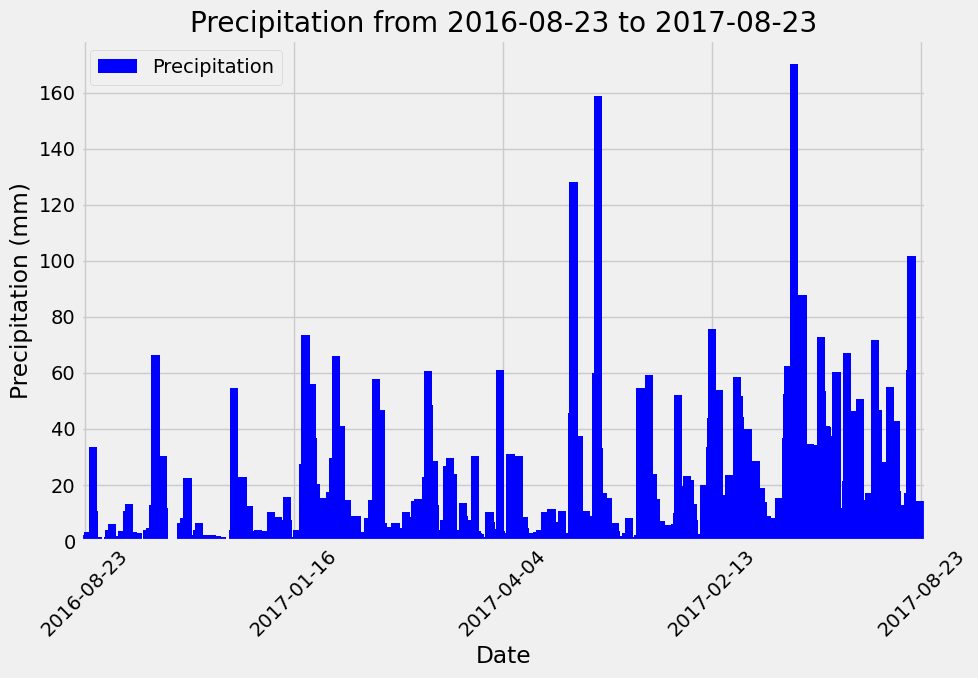

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(f"The most recent data collected is for the {formatted_date}")

# Calculate the date one year from the last date in data set.
twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(twelve_months)

# Perform a query to retrieve the data and precipitation scores
Precipitation_data = session.query(analysis.date, analysis.prcp).all()
# #Print Check
# print(Precipitation_data[0])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_dataset = session.query(analysis.date, analysis.prcp).filter(analysis.date >= "2016-08-23").filter(analysis.date <="2017-08-23").all()
Precipitation_df= pd.DataFrame(Precipitation_dataset, columns=['date', 'prcp']).set_index('date').dropna()
Precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data
ax = Precipitation_df.plot(kind='bar', figsize=(10,7), rot=45, width=20, color='blue',linewidth=1)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (mm)")
ax.set_title(f"Precipitation from {twelve_months} to {formatted_date}")

# Set x-tick labels to show only 5 values
n = 5
ticks = ax.get_xticks()
tick_labels = [Precipitation_df.index[int(i)] for i in np.linspace(0, len(Precipitation_df.index) - 1, n)]
ax.set_xticks(np.linspace(ticks[0], ticks[-1], n))
ax.set_xticklabels(tick_labels)

# Change the legend name to "Precipitation"
ax.legend(["Precipitation"])

#Show plot
plt.tight_layout()
plt.show()


In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

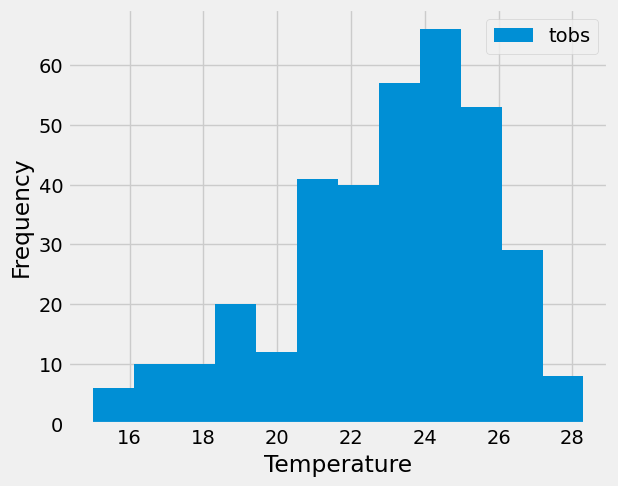

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()